<a href="https://colab.research.google.com/github/KaiMJ/AI/blob/main/TensorflowCoursera1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# imports

import tensorflow as tf
import numpy as np
from tensorflow import keras

from os import path, getcwd, chdir

import matplotlib.pyplot as plt
from tensorflow.keras import models

import matplotlib.image as mpimg

import zipfile

from tensorflow.keras.optimizers import RMSprop

from google.colab import files
from keras.preprocessing import image

1) Housing Prices

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
def house_model(y_new):
    xs = np.array([1, 2, 3, 4, 5, 6, 7])
    ys = (50 * xs + 50) / 100
    model = keras.Sequential([
        keras.layers.Dense(units=1, input_shape=[1])
    ])
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(xs, ys, epochs=500)
    return model.predict(y_new)[0]

In [ ]:
prediction = house_model([7.0])
prediction

Epoch 1/500
1/1 [==============================] - 0s 293ms/step - loss: 1.4235
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5248
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2181
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1133
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0772
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0646
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0601
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0582
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 0.0573
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0567
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0562
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0557
Epoch 13/500
1/1 [==============================] - 0

array([4.0331874], dtype=float32)

2) Handwriting Recognition

In [ ]:
import tensorflow as tf
from os import path, getcwd, chdir

In [ ]:
path = f"{getcwd()}/mnist.npz"
path

'/content/mnist.npz'

In [ ]:
def train_mnist():
    
    class myCallBack(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
          if logs is not None and (logs.get('accuracy') > 0.99):
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True
    
    callbacks = myCallBack()
    
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path=path)    
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    history = model.fit(
        x_train, y_train, epochs=10, callbacks=[callbacks]
    )
    
    return history.epoch, history.history['accuracy']

In [ ]:
train_mnist()

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2028 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9910
Reached 99% accuracy so cancelling training!


([0, 1, 2, 3, 4],
 [0.9395666718482971,
  0.9760666489601135,
  0.9832000136375427,
  0.9887499809265137,
  0.991016685962677])

# 3) Fashion MNIST with Conv2D and MaxPooling with Layer visualization

In [ ]:
def fmnist_Conv():
  fmnist = tf.keras.datasets.fashion_mnist
  (x_train, y_train), (x_test, y_test) = fmnist.load_data()
  x_train = x_train.reshape(60000, 28, 28, 1)
  x_train = x_train / 255.0
  x_test = x_test.reshape(10000, 28, 28, 1)
  x_test = x_test / 255.0
  model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
          tf.keras.layers.MaxPool2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())
  model.fit(x_train, y_train, epochs=10)
  test_loss = model.evaluate(x_test, y_test)

  return model, test_loss, x_test, y_test

In [ ]:
fmnist_model, fmnist_loss, x_test, y_test = fmnist_Conv()

4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
___________________________________________________________

In [ ]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [ ]:
def plotConvMap(model, num_layers, display_images, images=[], CONVOLUTION_NUMBER=0):

  f, axarr = plt.subplots(len(images), 1 + num_layers)

  layer_outputs = [layer.output for layer in model.layers]
  activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

  for i in range(len(images)):
    axarr[i, 0].imshow(display_images[images[i]].reshape(28, 28))

  for x in range(0, num_layers):
    for i in range(len(images)):
      f = activation_model.predict(display_images[images[i]].reshape(1, 28, 28, 1))[x]
      axarr[i, x+1].imshow(f[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
      axarr[i, x+1].grid(False)

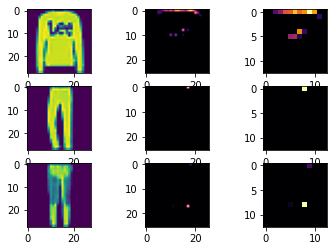

In [ ]:
plotConvMap(model, num_layers=2, images=[1, 2, 3], CONVOLUTION_NUMBER=5)

# 4) Improved MNIST with only 1 Conv2D and MaxPool layer each

In [ ]:
model.layers

In [ ]:
import tensorflow as tf
from os import path, getcwd, chdir

path = f"{getcwd()}/mnist.npz"
path

'/content/mnist.npz'

In [ ]:
def train_mnist_conv():
    class myCallBack(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs is not None and logs.get('accuracy') >= 0.998:
                print("Reached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True
    
    callbacks = myCallBack()

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)

    training_images = training_images.reshape(60000, 28, 28, 1) / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1) / 255.0

    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        training_images, training_labels, epochs=20, callbacks=[callbacks]
    )

    return history.epoch, history.history['accuracy'][-1], model, test_images

In [ ]:
epoch, accuracy, model, x_test = train_mnist_conv()

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1440 - accuracy: 0.9579
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0472 - accuracy: 0.9854
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0293 - accuracy: 0.9907
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0185 - accuracy: 0.9939
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

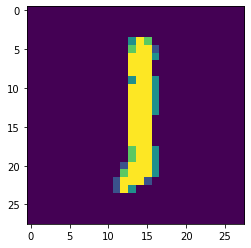

In [ ]:
plt.imshow(x_test[14].reshape(28, 28))

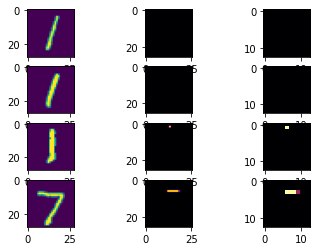

In [ ]:
plotConvMap(model, 2, x_test, [2, 5, 14, 0], 127)

# 5) ConvNet with fit_generator


In [4]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
150MB [00:00, 161MB/s]


In [5]:
import os
import zipfile


local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('./horse-or-human/horses')

train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(len(train_horse_names), train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(len(train_human_names), train_human_names[:10])

500 ['horse32-6.png', 'horse11-8.png', 'horse35-7.png', 'horse34-5.png', 'horse50-5.png', 'horse44-1.png', 'horse35-4.png', 'horse37-0.png', 'horse06-8.png', 'horse41-5.png']
527 ['human17-08.png', 'human14-01.png', 'human09-22.png', 'human07-12.png', 'human07-15.png', 'human06-21.png', 'human12-14.png', 'human01-06.png', 'human16-07.png', 'human15-03.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
nrows = 4
ncols = 4

pic_index = 0

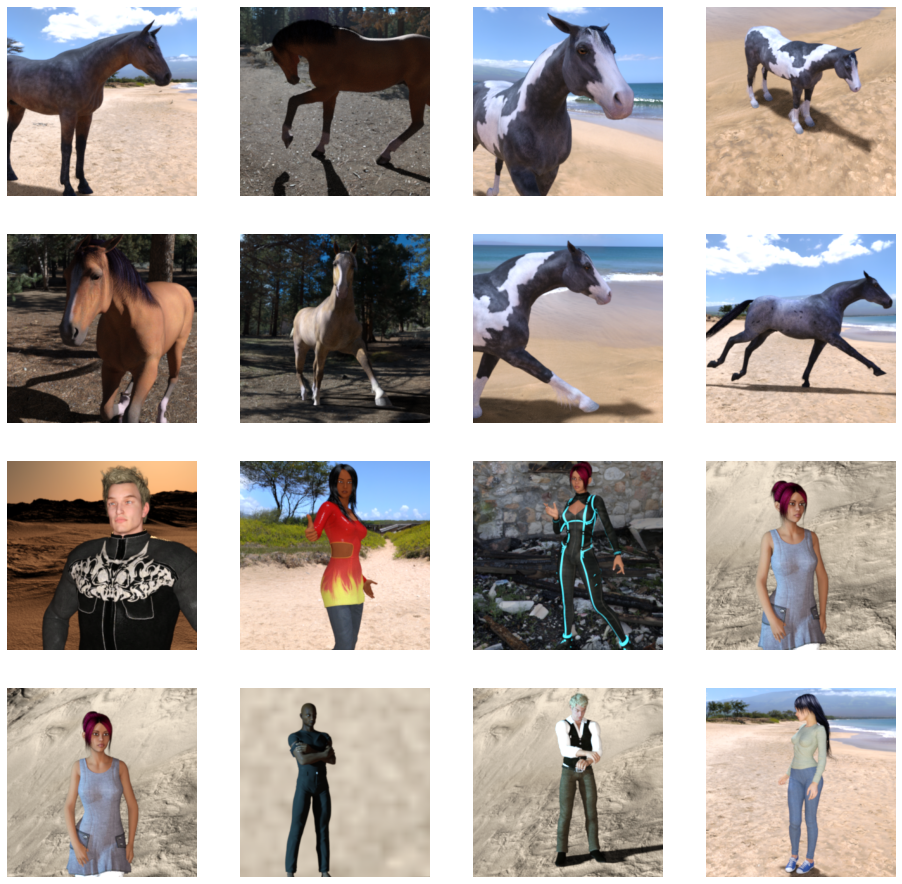

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                    for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                    for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 41s 1s/step - loss: 1.9627 - accuracy: 0.5584
Epoch 2/15
8/8 [==============================] - 7s 781ms/step - loss: 0.6654 - accuracy: 0.6040
Epoch 3/15
8/8 [==============================] - 7s 816ms/step - loss: 0.7343 - accuracy: 0.6774
Epoch 4/15
8/8 [==============================] - 7s 819ms/step - loss: 0.4886 - accuracy: 0.7664
Epoch 5/15
8/8 [==============================] - 7s 808ms/step - loss: 0.5863 - accuracy: 0.7175
Epoch 6/15
8/8 [==============================] - 7s 785ms/step - loss: 0.8967 - accuracy: 0.8142
Epoch 7/15
8/8 [==============================] - 7s 780ms/step - loss: 0.2610 - accuracy: 0.8954
Epoch 8/15
8/8 [==============================] - 7s 833ms/step - loss: 0.1795 - accuracy: 0.9210
Epoch 9/15
8/8 [==============================] - 7s 984ms/step - loss: 0.7353 - accuracy: 0.7942
Epoch 10/15
8/8 [==============================] - 7s 846ms/step - loss: 0.1933 - accuracy: 0.9310
Epoch 11/15
8/8 [====

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse1.jpeg to horse1 (4).jpeg
Saving horse2.jpeg to horse2 (4).jpeg
Saving horse3.jpeg to horse3 (4).jpeg
Saving human1.jpeg to human1 (4).jpeg
Saving human2.jpeg to human2 (4).jpeg
Saving human3.jpeg to human3 (4).jpeg
[0.]
horse1.jpeg is a horse
[1.]
horse2.jpeg is a human
[0.]
horse3.jpeg is a horse
[0.]
human1.jpeg is a horse
[1.]
human2.jpeg is a human
[1.]
human3.jpeg is a human


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


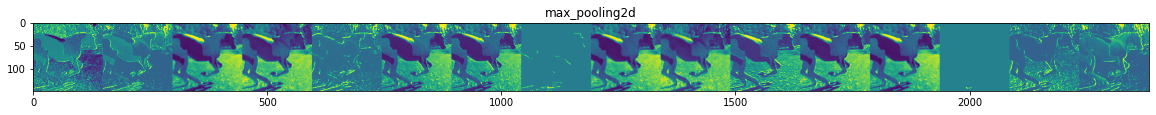

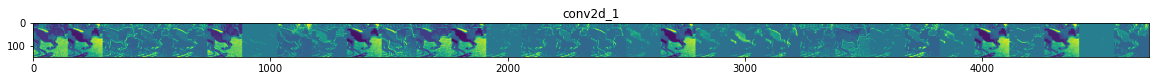

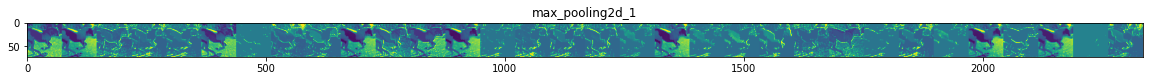

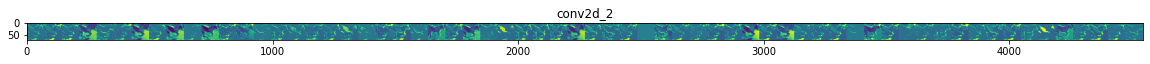

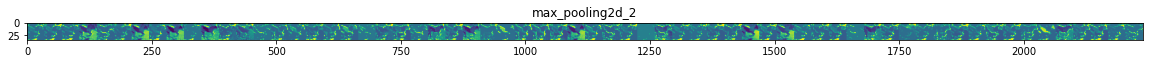

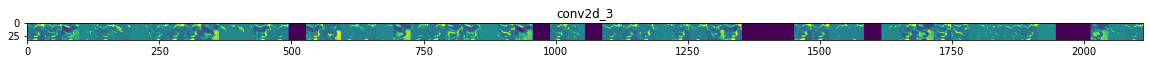

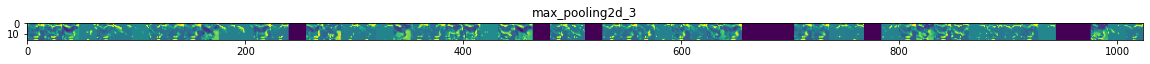

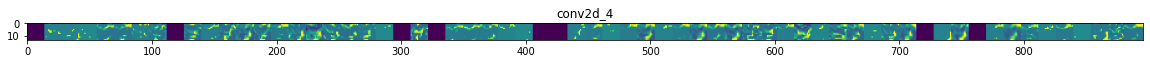

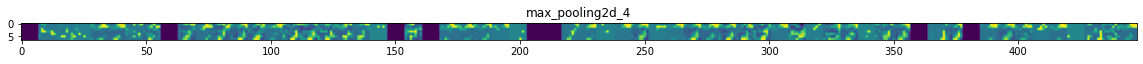

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 6) Validation

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-09-27 19:51:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.119.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.06s   

2021-09-27 19:51:20 (195 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [29]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [30]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse42-3.png', 'horse24-9.png', 'horse08-8.png', 'horse02-6.png', 'horse36-0.png', 'horse48-2.png', 'horse25-5.png', 'horse47-8.png', 'horse37-9.png', 'horse19-6.png']
['human11-25.png', 'human07-05.png', 'human06-21.png', 'human14-19.png', 'human05-30.png', 'human01-13.png', 'human13-20.png', 'human04-00.png', 'human03-01.png', 'human16-09.png']
['horse5-002.png', 'horse2-218.png', 'horse5-402.png', 'horse5-164.png', 'horse5-100.png', 'horse6-345.png', 'horse5-123.png', 'horse4-588.png', 'horse6-544.png', 'horse1-335.png']
['valhuman03-11.png', 'valhuman03-17.png', 'valhuman04-19.png', 'valhuman01-05.png', 'valhuman04-18.png', 'valhuman05-10.png', 'valhuman04-05.png', 'valhuman03-04.png', 'valhuman01-10.png', 'valhuman04-06.png']


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [32]:
import tensorflow as tf

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [34]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 881ms/step - loss: 3.1385 - acc: 0.4883 - val_loss: 0.8731 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 857ms/step - loss: 0.8190 - acc: 0.6240 - val_loss: 0.8472 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 7s 899ms/step - loss: 0.3804 - acc: 0.8262 - val_loss: 0.9884 - val_acc: 0.6875
Epoch 4/15
8/8 [==============================] - 7s 858ms/step - loss: 0.3590 - acc: 0.8710 - val_loss: 0.6834 - val_acc: 0.7383
Epoch 5/15
8/8 [==============================] - 7s 853ms/step - loss: 0.1231 - acc: 0.9655 - val_loss: 0.5995 - val_acc: 0.8711
Epoch 6/15
8/8 [==============================] - 7s 843ms/step - loss: 0.0972 - acc: 0.9611 - val_loss: 1.0873 - val_acc: 0.8203
Epoch 7/15
8/8 [==============================] - 7s 852ms/step - loss: 0.0278 - acc: 0.9911 - val_loss: 2.1674 - val_acc: 0.7422
Epoch 8/15
8/8 [==============================] - 7s 859ms/step - loss: 0.1405 - acc: 0.96

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving econ3 schedule.jpg to econ3 schedule.jpg
[1.]
econ3 schedule.jpg is a human


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


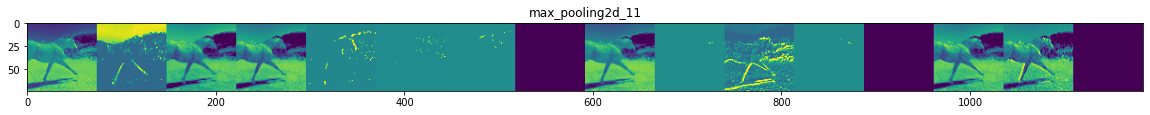

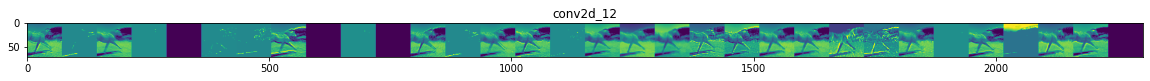

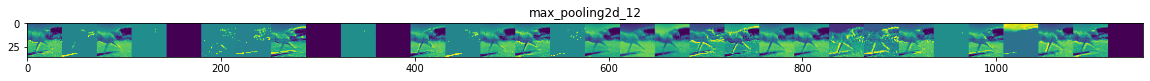

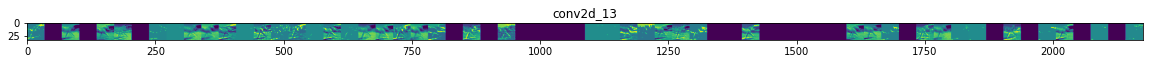

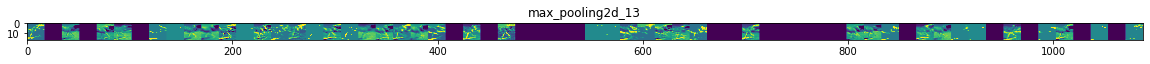

In [38]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 7) Happy vs. Sad

In [42]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"


path = f"/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2021-09-27 20:57:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-09-27 20:57:19 (107 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [ ]:
import matplotlib.pyplot as plt


In [54]:

imgPath = os.path.join('/tmp/h-or-s/')
os.chdir(imgPath)
imgPath
listdir
# plt.imshow('/tmp/h-or-s/')

'/tmp/h-or-s/'

In [43]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
def train_happy_sad_model():
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         def on_epoch_end(self, epoch, logs={}):
           if (logs.get('acc') > DESIRED_ACCURACY):
             print('\nDesired Accuracy is met, Stopping training...')
             self.model.stop_training = True

    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


    train_datagen = ImageDataGenerator(rescale=1/255.0)

    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary'
    )

    history = model.fit(
        train_generator,
        steps_per_epoch=1,
        epochs=30,
        verbose=1,
        callbacks=[callbacks])
    # model fitting
    return history.history['acc'][-1]

In [48]:
train_happy_sad_model()

Found 80 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7026 - acc: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 255ms/step - loss: 0.8328 - acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 266ms/step - loss: 0.7177 - acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 258ms/step - loss: 0.6729 - acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 249ms/step - loss: 0.6109 - acc: 0.5250
Epoch 6/30
1/1 [==============================] - 0s 260ms/step - loss: 0.4977 - acc: 0.7500
Epoch 7/30
1/1 [==============================] - 0s 242ms/step - loss: 0.3939 - acc: 0.7500
Epoch 8/30
1/1 [==============================] - 0s 256ms/step - loss: 0.3146 - acc: 0.9125
Epoch 9/30
1/1 [==============================] - 0s 248ms/step - loss: 0.2142 - acc: 0.9375
Epoch 10/30
1/1 [==============================] - 0s 263ms/step - loss: 0.1980 - acc: 0.9500
Epoch 11/30
1/1 [==============================] - 0s 250ms/step - loss:

1.0